## Supervised Learning
## Project: Finding Donors for *CharityML*

### Table of Contents

1. [Project Background](#Project_Background)


2. [Exploring the Data](#Exploring_the_data)

    * [2.1 Implementation: Data Exploration](#implementation)
    * [2.2 Featureset Exploration ](#featureset)
            
        
3. [Preparing the Data](#prepare)

    * [3.1 Transforming skewed Continious Features](#transform)
    * [3.2 Normalizing Numerical Features](#normalize)
    * [3.3 Implementation: Data Preprocessing](#impliment)
    * [3.4 Shuffle and Split Data](#shuffle)
    
    
4. [Evaluating Model Performance](#evaluate)

  * [4.1 Metrics and the Naive Predictor](#shuffle)
     
     * [Question 1 - Naive Predictor Performace](#question_1)
   
   
  * [4.2  Supervised Learning Models ](#list)
     
     * [Question 2 - Model Application](#question_2)
  
  
  * [4.3 Implementation - Creating a Training and Predicting Pipeline](#pipeline)
  * [4.4 Implementation: Initial Model Evaluation](#initial_model)
  
  
5. [Improving Results](#improve)

      * [Question 3 – Choosing the Best Model](#question_3)
      * [Question 4 – Describing the Model in Layman's Terms](#question_4)
    
   * [5.1 Implementation: Model Tuning](#improve)
   
      * [Question 5 - Final Model Evaluation](#question_5)
      



6. [Feature Importance](#feature)

      * [Question 6 - Feature Relevance Observation](#question_6)
      

7. [Implementation - Extracting Feature Importance](#importance)

      * [Question 7. Implementation - Extracting Feature Importance](#question_7)


8 [Feature Selection](#selection)

   * [Question 8 - Effects of Feature Selection](#question_8)

9 [Reference](#reference)

## 1.  Project Background <a class="anchor" id="Project_Background"></a>

The goal of this project is to construct a supervised learning model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations. Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

In this project, three supervised algorithms will be employed to accurately model individuals' income using data collected from the 1994 U.S. Census.Then the best candidate algorithm will be chosen from the preliminary result and then will be optmized further by tuning the parameters to improve performance. 



The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## 2. Exploring the Data <a class="anchor" id="Exploring_the_data"></a>
By running the code cell below we load necessary Python libraries and the census data. The last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=3))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K


In [2]:
#unique_income_values
data.income.unique()

array(['<=50K', '>50K'], dtype=object)

#### 2.1 Implementation: Data Exploration <a class="anchor" id="implementation"></a>
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below,the following will be computed:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.


In [3]:
# Total number of records
n_records = data.shape[0]

# Number of records where individual's income is more than $50,000
n_greater_50k = len(data[data['income'] == '>50K'])

# Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data['income'] == '<=50K'])

# Percentage of individuals whose income is more than $50,000
greater_percent = round((n_greater_50k/n_records)*100, 2)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


#### 2.2 Featureset Exploration <a class="anchor" id="featureset"></a>

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## 3. Preparing the Data <a class="anchor" id="prepare"></a>
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

#### 3.1 Transforming Skewed Continuous Features <a class="anchor" id="transform"></a>
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

The code cell below plots a histogram of these two features that shows the range of the values present and how they are distributed.

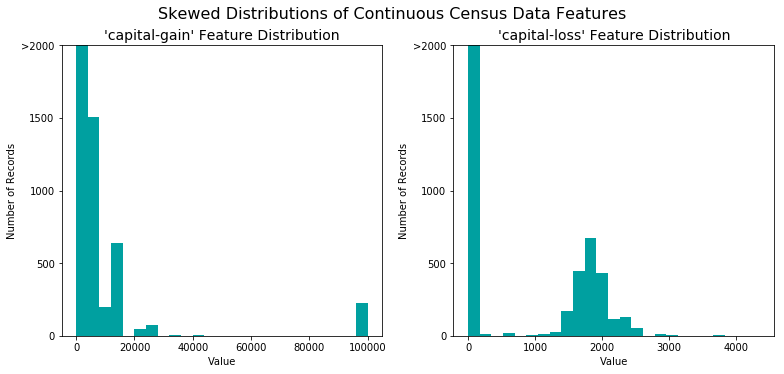

In [4]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is a common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

The code cell below to perform a transformation on the data and visualize the results and shows the range of values and how they are distributed. 

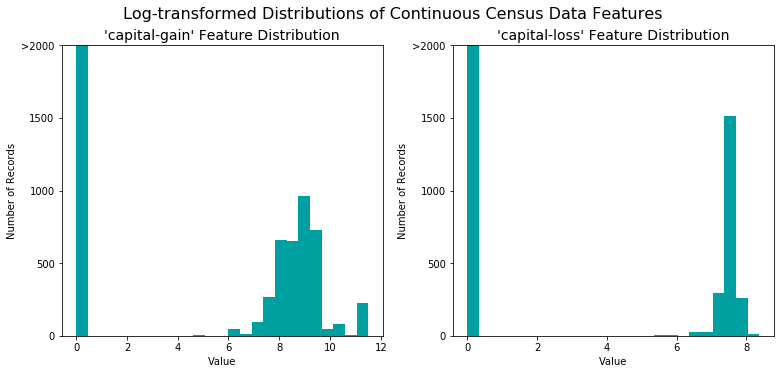

In [5]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

#### 3.2 Normalizing Numerical Features <a class="anchor" id="normalize"></a>
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

The code cell below normalizes each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [6]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 3))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States


#### 3.3 Implementation: Data Preprocessing <a class="anchor" id="impliment"></a>

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.


#### Results:

|  SomeFeature    |   someFeature_A    | someFeature_B   |someFeature_C|  
| :------------:  |    :-------------: | :------------: |:------------:|              
|     B           |              0     |     1          |     0        | 
|     C           |              0     |     0          |     1        |
|     A           |              1     |     0          |     0        |




Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - We shall use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries. This means, we will set the records with "<=50K" to `0` and records with ">50K" to `1`.

In [7]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.map({'>50K':1,'<=50K':0})

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
# print (encoded)

103 total features after one-hot encoding.


In [8]:
# show the first three rows after hot encoding
features_final.head(3)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


#### 3.4 Shuffle and Split Data <a class="anchor" id="shuffle"></a>
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.The code cell below to perform this split.

In [9]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)



## 4. Evaluating Model Performance <a class="anchor" id="evaluate"></a>
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

#### 4.1 Metrics and the Naive Predictor <a class="anchor" id="shuffle"></a>
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace <a class="anchor" id="question_1"></a>

* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

**HINT:** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [10]:
# number of person who earns more than 50K
TP = np.sum(income) 

# False positive- the difference between the total (considering everyone earns more than 50K) 
# and the people who actually earns more than 50K
FP = len(income)-TP # Specific to the naive case



TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case


# Calculate accuracy, precision and recall
accuracy = TP/(TP+FP+TN+FN)
recall =  TP/(TP+FN)
precision = TP/(TP+FP)

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1 + beta**2)*(precision *recall)/((beta**2*precision) + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


#### 4.2  Supervised Learning Models <a class="anchor" id="list"></a>
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application <a class="anchor" id="question_2"></a>
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?


### Model-1: Logistic Regression [Ref- 1,2,3]: 
 
Logistic regression performs binary classification meaning when the label outputs are binary. It gives us a discrete binary outcome between 0 and 1.

 
#### Real World application of  Logistic Regression: 

Below are some popular real world application of the Logistic regression  algorithm.
 
- Predicting the Customer Churn
- Credit Scoring & Fraud Detection
- Measuring the effectiveness of marketing campaigns

#### Strengthts of Logistic Regression
 
- Logistic regression provides us with a lots of ways to regularize the modeland we don't need to worry about the features being correlated, like Naive Bayes. 
- The modedl can take in new data, unlike decision trees or SVMs
- Logistic regression can help to find the contributing factors behind the prediction. So it does not work like a  black box method.


#### Weakness of Logistic Regression

1. One of the primary limitations of Logistic Regression is the assumption of linearity between the dependent variable and the independent variables. In the real world, the data is rarely linearly separable. 

2. If the number of observations are lesser than the number of features, Logistic Regression should not be used, otherwise it may lead to overfit.
 
####  Why Logistic Regression is a good candidate?
 
- This problem at its core is a binary classification problem that predicts whether somebody earns more than 50 thousand or not (and thereby identifying the donars from the others). Logistic Regression is a method specially desgined for binary classification like this one. 

- Logistic Regression is very easy to implement and very efficient to train.

### Model-2: Random Forest [Ref-1, 4, 5,6,7]:

 
#### Real World application of Random Forest: 

- In the banking sectorthe algorithm is used for detectting the fraud transactions. 

- Medicines: Medicines needs a complex combination of specific chemicals. Thus, to identify the great combination in the medicines, Random forest can be used. 

- Random forest algorithm, can be used to detect the behavior of the stock marke. Also, it can show the expected loss or profit which can be produced while purchasing a particular stock.

- In E-Commerce to recommend or suggest products for customer random forest algorithm can be used. 


#### Strengthts of Random Forest:

- Random forests is considered a highly accurate and robust method because of the number of decision trees participating in the process.It can solve both regression and classification problems with large data sets. 

-  Since the model takes the average of all the predictions, which cancels out the biases, it does not suffer from overfitting problem.


- It helps to identify most significant variables from thousands of input variables.

- Random Forest is highly scalable to any number of dimensions and has generally quite acceptable performances.

#### Weakness of Random Forest:

- Random forests operates on predictions by multiple decision trees and once all the trees make a preduction the voting takes place. This whole process is time-consuming.

- The model is harder to  to interpret compared to a decision tree, as in case of a decision tree one can just wfollowing the path in the tree and make a decision.

- With Random Forest, it is not possible to iteratively improve the generated models. 

 
####  Why Random Forest is a good candidate: 

- Random forest runs efficiently on large data bases and shows the relative importance or contribution of each feature in the prediction. Therefore, in this case, we can also see which variables are the one that are related to the indivual income. 

- It has the power to handle a large data set with higher dimensionality, it provides higher accuracy. Considering our higher dimensional dataset, this is a suitable algorithm.



### Model-3:  Gradient Boosting Classifier [Ref- 1,8,9]
 
#### Real World application of Gradient Boosting:

- Gradient boosting can be used in the field of learning to rank. Some of the commercial web search engines like Yahoo and Yandex use variants of gradient boosting in their machine-learned ranking engines.


#### Strengthts of Gradient Boosting:

- The algorithm has a good predictive accuracy.

- This is a flexible algorithm - can optimize on different loss functions and provides several hyperparameter tuning options that make the function fit very flexible.

- No data pre-processing required - often works great with categorical and numerical values as is.
 


#### Weakness of Gradient Boosting:

- GBMs often require many trees which can increase the time and memory complexity of the algoritm.

- The high flexibility results in many parameters that interact and influence heavily the behavior of the approach (number of iterations, tree depth, regularization parameters, etc.). This requires a large grid search during tuning.


 
####  Why Gradient Boosting is a good candidate? 
 
- Gradient boosting models can be used for both classification and regression tasks. The algorithm performs well on complex datasets. The algorithm has an issue of overfitting, but this can be overcome by tuning the model's parameters and Hyperparameters





#### 4.3 Implementation - Creating a Training and Predicting Pipeline <a class="anchor" id="pipeline"></a>
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [11]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import accuracy_score, fbeta_score
from prettytable import PrettyTable



def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    This function creates a pipleline for a given model 
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
       
    output: 
       - result: a dictionary that contains the accuracy score, F-score, training and test score
          for a selected algorithm
    
    '''
 
    results = {}
    
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
    
        
    # Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
  
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
  
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)

    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300],predictions_train, beta = 0.5)

        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta = 0.5)
 
    
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))

    
    # Return the results
    return results

In [12]:
# importing color 
class color:
   BOLD = '\033[1m'
   END = '\033[0m'

#### 4.4 Implementation: Initial Model Evaluation  <a class="anchor" id="initial_model"></a>

- **Import models**: Three supervised learning models discussed in the previous section are imported.

- **Initialize the models**: Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - A `'random_state'` for each model you use, if provided.
  - **Note:** The default settings for each model is used — later one specific model will be tuned to optimize in a later section.
  
- **Calculate sample size** Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on the algorithms, following implementation runs in various timeframe. 

In [13]:
#  Import the three supervised learning models from sklearn
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from prettytable import PrettyTable

# define the pretty table headers to show the model evaluation matrix in a table
t = PrettyTable ([color.BOLD +'Learner','train_time','prediction_time', 'test_accuracy', 'test_fscore'+color.END])

# TODO: Initialize the three models
#clf_A = svm.SVC(random_state= 42)
clf_A = LogisticRegression(random_state=42)
clf_B = GradientBoostingClassifier(random_state = 42)
clf_C = RandomForestClassifier(random_state = 42)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(0.1*samples_100)
samples_1 = int(0.01*samples_100)


# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)
        
        if samples == samples_100:
        
            row = [clf_name, round(results[clf_name][0]['train_time'],3),
                   round(results[clf_name][i]['pred_time'],3),
                   round(results[clf_name][i]['acc_test'],2),
                   round(results[clf_name][i]['f_test'],2)]
            t.add_row(row)
            
print(color.BOLD +"\n  Table-1: summary of the models when all the training data is used:"+color.END)
print(t)


LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.
GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.
RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.

  Table-1: summary of the models when all the training data is used:
+----------------------------+------------+-----------------+---------------+-------------+
|          Learner           | train_time | prediction_time | test_accuracy | test_fscore |
+----------------------------+------------+-----------------+---------------+-------------+
|     LogisticRegression     |   0.004    |      0.003      |      0.84     |     0.68    |
| GradientBoostingClassifier |   0.097    |       0.03      |      0.86     |     0.74    |
|   RandomForestClassifier   |   0.018

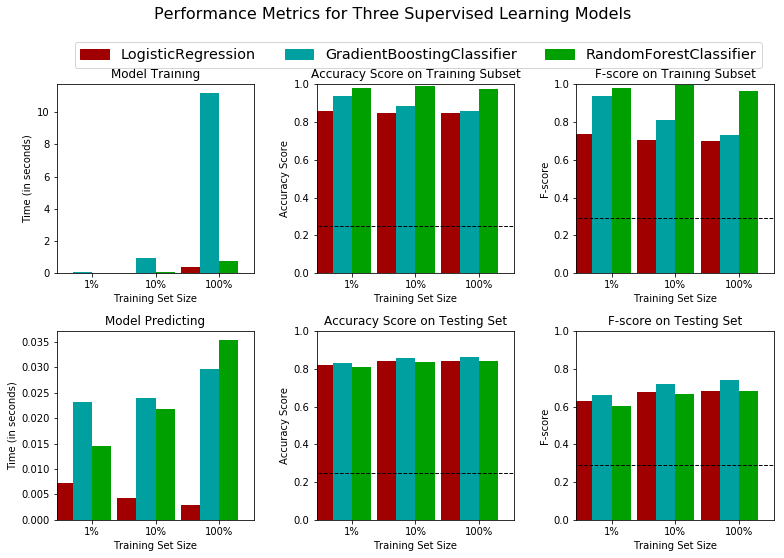

In [14]:
# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
##  5. Improving Results <a class="anchor" id="improve"></a>
In this final section, one from the three supervised learning models will be chosen as the *best* model to use on the data. Tthen a grid search optimization will be performed for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model <a class="anchor" id="question_3"></a>

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Question 3 Answer:**

For a summary of accuracy and F-score when 100% of the training set is used please see the **Table-1** above.

- LogisticRegression algorithm has almost similar prediciton time and fbets score as the RandomForestClassifier.


- When all the training data is used GradientBoostingClassifier has very similar prediction time with the two others but the GradientBoostingClassifier has an **fbeta score 0.74** which is better than the fbeta score 0.68 of RandomForestClassifier. 

- Since **GradientBoostingClassifier** has a higher accuracy and can predict the data withing a reasonable time frame this make it the most likely candidate.

### Question 4 - Describing the Model in Layman's Terms <a class="anchor" id="question_4"></a>

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

**Answer:Question 4** [**Ref-8**] 

Imagine you are playing a game in which you are trying to find out if a person is a man or a woman without explicityl asking about his gender. 

The term ‘Boosting’ refers to a family of algorithms which converts weak learner to strong learners. Imagine you want to classify whether an email is a spam or not and to identify that you have the following criteria -:

- 1. Email has only an image file (promotional image), It’s a SPAM
- 2. Email has only link(s), It’s a SPAM
- 3. Email body consist of sentence like “You won a prize money of $ xxxxxx”, It’s a SPAM
- 4. Email from a specific official domain “abcd.com”, Not a SPAM
- 5. Email from a known source, Not a SPAM

Individually, these rules may not be powerful enough to distinguis whether an an email is ‘spam’ or ‘not spam’. Therefore, these rules are called as weak learner. We can combine these weak learner and together they will form a strong learner capable of classifying with a much higher accracy. Out of these 5, 3 are voted as ‘SPAM’ and 2 are voted as ‘Not a SPAM’. In this case, we’ll consider the email as SPAM because we have higher(3) vote for ‘SPAM’.

The gradient boosting algorithm can be explained in the following three step-

**Step 1**: The base learner takes all the distributions and assign equal weight or attention to each observation (each row in the dataset).

**Step 2**: After step one we might end up with some prediction error. Then we pay higher attention to these predection error and apply the next base algortihm.

**Step 3**: Iterate Step 2 till the limit of base learning algorithm is reached or higher accuracy is achieved. We can improve the accuracy of the model by tuning the parameters. 


#### 5.1 Implementation: Model Tuning <a class="anchor" id="tune"></a>
Now we will fine tune the GradientBoostingClassifier. We will use grid search (`GridSearchCV`) with to tune some important parameters. You need to use the entire training set for this. Following steps are followed for the implimentation:
- First we import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier and store it in `clf`.
 - The `random_state` is chosen.
- A dictionary of parameters is created to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [15]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn import grid_search
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV

# TODO: Initialize the classifier
clf =  GradientBoostingClassifier(random_state=42)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
parameters = { 'min_samples_leaf': [50, 100, 150, 200], 
              'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 5, 7]}


# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta= 0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

/opt/conda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Unoptimized model
------
Accuracy score on testing data: 0.8630
F-score on testing data: 0.7395

Optimized Model
------
Final accuracy score on the testing data: 0.8697
Final F-score on the testing data: 0.7492


### Question 5 - Final Model Evaluation <a class="anchor" id="question_5"></a>

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |    0.8630         |    0.8697       |
| F-score        |    0.7395         |   0.7492        |


**Answer of Question 5:**

- The optimised model has an accuracy score of 86.97%, which is slightly higher accuracy of the unoptimized model- that is 86.30% . The optimised model has an F-score of 74.92%, which is also 0.97% higher then the unoptimised models 64.93% score. So, both the accuracy and F-score slighly improves incase of the Optimized model compared to the Unoptimised models.

- The result obtained from the optimized model is obviously much better compared to the bencmarks predictor naive model that always always assumes an individual made more than $50,000. The optimised model performance shows the model choice was vastly more accurate than a naive base.

----
## 6. Feature Importance  <a class="anchor" id="feature"></a>

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation  <a class="anchor" id="question_6"></a>
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer of Question 6:**

1. **Education**: Education in my opinion is the most important predictor as a person with a bachelor or a doctorate degree in a subject like computer science is likely to earn much more than a person with a 7th-8th grade education.


2. **Occupation** : Occupation is also very important as a person with a speciality in a technical field or a doctor has a much higher likelihood of earning a high wage than a repairman. Occupation has a close relation with educaiton. 


3. **Hours-per-week** : While income depends on level of education and occupation two person having the same job but one with longer working hours is likely to earn more. That's why I rank it in number 3.


4. **Capital-gain**: The current status of the person in terms of capital is a significant indication of whether somebody will be willing to donate or not.


5. **Age**: A person who has less experience might have a lower level of income. Also, a person who is too old and is a pensioneer might not have a higher level of income. 

## 7. Implementation - Extracting Feature Importance <a class="anchor" id="importance"></a>
Now we shall choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

This will be implimented in following steps:
 - Initiate the gradient boosting classifier. 
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

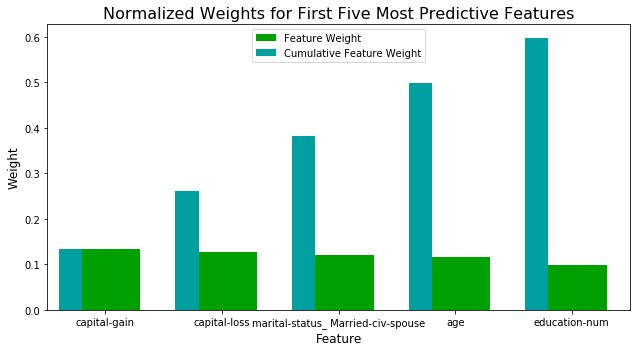

In [16]:
# TODO: Import a supervised learning model that has 'feature_importances_'
clf = GradientBoostingClassifier(random_state=42)

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = clf.fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance <a class="anchor" id="question_7"></a>

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?


**Answer:**

- **Age, Education** and **capital-gain** are the three features that have coincided with mine. 

- However, the exclusion of **occupation** and the inclusion of the **capital-loss** and  **marital-status** are the features that has surprised me.

- These features might might be important as a couple can combine their earnings, or people with monetary success get more opportunities to be in a relationship.




#### 7.1 Feature Selection  <a class="anchor" id="selection"></a>
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. 

From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model we found earlier, and train it on the same training set *with only the top five important features*. 

In [17]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8697
F-score on testing data: 0.7492

Final Model trained on reduced data
------
Accuracy on testing data: 0.8588
F-score on testing data: 0.7247


### Question 8 - Effects of Feature Selection <a class="anchor" id="question_8"></a>

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

- The final model's F-score- 72.47% and accuracy score 85.88% with the reduced data is indeed highly comparable to the model with all the features that has the accuracy score 86.97% and F-score 75.92%.

- Yes, the reduced dimension means a much improved traning time and I shall consider using the reduced data as my training set as reduced dimensions means reduced data and less noise. It improves the model accuracy and reduce the traning time . 


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

## Before You Submit
You will also need run the following in order to convert the Jupyter notebook into HTML, so that your submission will include both files.

In [18]:
!!jupyter nbconvert *.ipynb

['[NbConvertApp] Converting notebook finding_donors.ipynb to html',
 '[NbConvertApp] Writing 518628 bytes to finding_donors.html',
 '[NbConvertApp] Converting notebook finding_donors-JR.ipynb to html',
 '[NbConvertApp] Writing 418765 bytes to finding_donors-JR.html',
 '[NbConvertApp] Converting notebook plot_iris_dataset.ipynb to html',
 '[NbConvertApp] Writing 288681 bytes to plot_iris_dataset.html',
 '[NbConvertApp] Converting notebook Project_1B_ Project_Template.ipynb to html',
 '[NbConvertApp] Writing 349506 bytes to Project_1B_ Project_Template.html']

## 9-Reference <a class="anchor" id="reference"></a>


1. [Supervised learning Algorithms](https://scikit-learn.org/stable/modules/svm.html)

2. [Choosing the Right Machine Learning Algorithm](https://hackernoon.com/choosing-the-right-machine-learning-algorithm-68126944ce1f)

3. [The Logistic Regression Algorithm](https://machinelearning-blog.com/2018/04/23/logistic-regression-101/#:~:text=A%20disadvantage%20of%20it%20is,it's%20decision%20surface%20is%20linear.&text=Since%20its%20outcome%20is%20discrete,for%20its%20vulnerability%20to%20overfitting.)

4. [Random Forest Analysis in ML and when to use it](shorturl.at/ksOW7).

5. [Application of Random Forest Algorithm in Machine Fault Diagnosis](https://link.springer.com/chapter/10.1007/978-1-84628-814-2_82)

6. [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

7. [Understanding Random Forests Classifiers in Python](https://www.datacamp.com/community/tutorials/random-forests-classifier-python#algorithm)
 
8. [Quick Introduction to Boosting Algorithms in Machine Learning](https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/)

9. [Complete Machine Learning Guide to Parameter Tuning in Gradient Boosting (GBM) in Python](https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/)

10. [Feature Selection Techniques in Machine Learning with Python](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e)

11. [How to print text in bold in pyton notebook.](https://stackoverflow.com/questions/8924173/how-do-i-print-bold-text-in-python)

12. [The Hitchhiker’s Guide to Feature Extraction](https://www.kdnuggets.com/2019/06/hitchhikers-guide-feature-extraction.html)